<a href="https://colab.research.google.com/github/Prethumnan/computer-vision-using-vgg16/blob/main/computer_vision_using_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import tensorflow
import cv2
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
loc='/content/drive/My Drive/train_SOaYf6m/images/'

In [4]:
def show(image):
    img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,7))
    plt.imshow(img)

In [13]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/train_SOaYf6m/vehicle_train.csv")
test=pd.read_csv("/content/drive/MyDrive/train_SOaYf6m/vehicle_test.csv")

In [6]:
data

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [15]:
#Converting datatype from int to str
data['emergency_or_not'] = data['emergency_or_not'].astype(str)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(data["image_names"],data["emergency_or_not"],test_size=0.2)

In [17]:
train_df=pd.concat([x_train,y_train],axis=1)
test_df=pd.concat([x_test,y_test],axis=1)

In [18]:
train_df

,image_names,emergency_or_not
1256,1099.jpg,0
1570,1367.jpg,0
1240,2100.jpg,0
1055,1932.jpg,0
630,1753.jpg,0
...,...,...
724,1451.jpg,0
1329,681.jpg,1
396,745.jpg,1
466,1601.jpg,0


In [19]:
data.dtypes

image_names         object
emergency_or_not    object
dtype: object

* ImageDataGenerator to do data augumentation
* The idea is to generate new, synthetic samples from the original training data by applying random transformations such as rotation, flipping, scaling, and cropping

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    validation_split = 0.2)

training_set = train_datagen.flow_from_dataframe(
    train_df,                                           #train dataset
    loc,                                                #Location where all the images present
    x_col='image_names',
    y_col='emergency_or_not',
    target_size= (224,224),
    class_mode='categorical',
    shuffle = True,
    batch_size = 32,
    subset = 'training')


validation_set = train_datagen.flow_from_dataframe(
    test_df, 
    loc, 
    x_col='image_names',
    y_col='emergency_or_not',
    target_size= (224,224),
    class_mode='categorical',
    shuffle = True,
    batch_size = 32,
    subset = 'validation')

test_df = test
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_dataframe(
        test_df,
        loc,
        x_col = 'image_names',
        y_col = None,
        target_size=(224,224),
        batch_size=32,
        shuffle = False,
        class_mode = None)

Found 1053 validated image filenames belonging to 2 classes.
Found 66 validated image filenames belonging to 2 classes.
Found 706 validated image filenames.


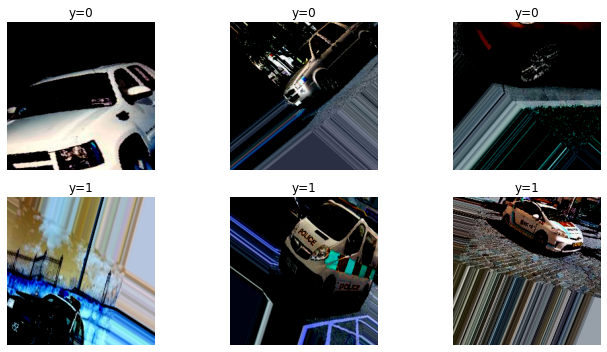

In [ ]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in train_generator:
        plt.imshow((x[0]))
        plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [22]:
from  keras.applications import VGG16
import tensorflow as tf

model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3))


# Existing layers are not trained or simply freezing all the layers before the 1st fully connected layer
for layer in model.layers:
    layer.trainable = False

# Adding more layers to the model
flatten = Flatten()(model.output) #flattening  the last layers in the above model
dense_1 = Dense(units = 200, activation= 'relu')(flatten)
dense_2 =Dense(units = 200, activation= 'relu')(dense_1)
dense_3 = Dense(units = 200, activation= 'relu')(dense_2)

# output layer neurons is kept to 1 since it is binary classification problem
output = Dense(units = 2, activation = 'softmax')(dense_3) 
model  = tf.keras.Model(inputs = model.input, outputs = output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

***Early stopping***
* Early stopping is a regularization technique used in machine learning to prevent overfitting.
* Overfitting occurs when a model is too complex for the data it is being trained on and therefore starts to memorize the training data instead of generalizing to new data.
* This results in a model that performs well on the training data but poorly on unseen data.

***Model checkpoint***
* Assume we are playing a game, in that game i have went upto the 8th level. Now unexpectly my laptop starts restarting.I didn't even save the game. Now i have to start from the scrach. suppose if i have saved the game, i need not to worry. This is what exactly happens while using model checkpoint. I am just saving the model best parameters after each epoch.

In [23]:
#Early stopping to get opimal epochs
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 4)
MC = ModelCheckpoint('VGG16.h5', monitor = 'val_accuracy')

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = training_set, validation_data = validation_set, epochs = 10, callbacks = [ES, MC])

Epoch 1/10
33/33 [==============================] - 782s 24s/step - loss: 0.6503 - accuracy: 0.7151 - val_loss: 0.3030 - val_accuracy: 0.8939
Epoch 2/10
33/33 [==============================] - 716s 22s/step - loss: 0.3381 - accuracy: 0.8557 - val_loss: 0.4136 - val_accuracy: 0.8333
Epoch 3/10
33/33 [==============================] - 709s 21s/step - loss: 0.3461 - accuracy: 0.8443 - val_loss: 0.1622 - val_accuracy: 0.9242
Epoch 4/10
33/33 [==============================] - 710s 22s/step - loss: 0.2668 - accuracy: 0.8860 - val_loss: 0.1126 - val_accuracy: 0.9697
Epoch 5/10
33/33 [==============================] - 712s 22s/step - loss: 0.2816 - accuracy: 0.8908 - val_loss: 0.1869 - val_accuracy: 0.9394
Epoch 6/10
33/33 [==============================] - 707s 21s/step - loss: 0.1822 - accuracy: 0.9212 - val_loss: 0.0789 - val_accuracy: 0.9697
Epoch 7/10
33/33 [==============================] - 703s 21s/step - loss: 0.1993 - accuracy: 0.9288 - val_loss: 0.2587 - val_accuracy: 0.8939
Epoch 

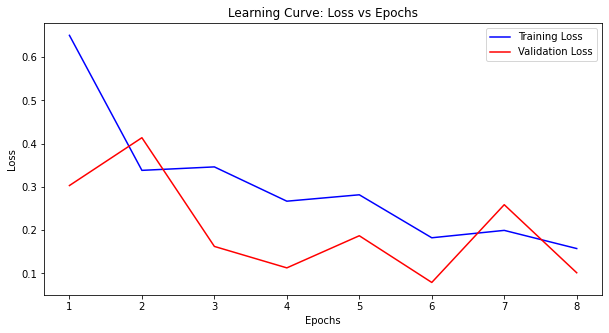

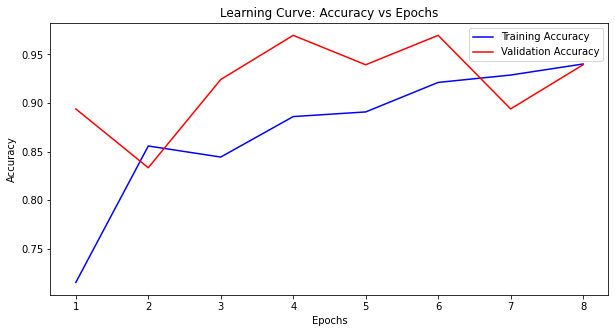

In [24]:
import matplotlib.pyplot as plt

# Store the loss and accuracy values from each epoch
epochs = [1, 2, 3, 4, 5, 6, 7, 8]
training_loss = [0.6503, 0.3381, 0.3461, 0.2668, 0.2816, 0.1822, 0.1993, 0.1573]
validation_loss = [0.3030, 0.4136, 0.1622, 0.1126, 0.1869, 0.0789, 0.2587,0.1013 ]
training_acc = [0.7151, 0.8557, 0.8443, 0.8860, 0.8908, 0.9212, 0.9288, 0.9402]
validation_acc = [0.8939, 0.8333, 0.9242, 0.9697, 0.9394, 0.9697, 0.8939,0.9394]

# Plot the learning curve
plt.figure(figsize=(10,5))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Learning Curve: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, training_acc, 'b', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation Accuracy')
plt.title('Learning Curve: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [27]:
from keras.models import load_model
vgg16 = load_model('VGG16.h5')
predict_prob = vgg16.predict(test_set)
predict_model = np.argmax(predict_prob,axis=1)
predict_model

submission = pd.DataFrame({"image_names":test_df['image_names'],
                           "mergency_or_not":predict_model})
submission.to_csv('submission_model.csv', index = False)

23/23 [==============================] - 485s 21s/step


In [32]:
model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3))


# Existing layers are not trained or simply freezing all the layers before the 1st fully connected layer
for layer in model.layers:
    layer.trainable = False

# Adding more layers to the model
flatten = Flatten()(model.output) #flattening  the last layers in the above model
dense_1 = Dense(units = 200, activation= 'relu')(flatten)
dense_1 = Dropout(0.5)(dense_1) # Adding Dropout to layer 1
dense_2 =Dense(units = 200, activation= 'relu')(dense_1)
dense_2 = Dropout(0.5)(dense_2) # Adding Dropout to layer 2
dense_3 = Dense(units = 200, activation= 'relu')(dense_2)
dense_3 = Dropout(0.5)(dense_3) # Adding Dropout to layer 3

# output layer neurons is kept to 1 since it is binary classification problem
output = Dense(units = 2, activation = 'softmax')(dense_3) 
model  = tf.keras.Model(inputs = model.input, outputs = output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [33]:
ES = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 4)
MC = ModelCheckpoint('VGG16_v2.h5', monitor = 'val_accuracy')

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = training_set, validation_data = validation_set, epochs = 10, callbacks = [ES, MC])

Epoch 1/10
33/33 [==============================] - 734s 22s/step - loss: 1.6306 - accuracy: 0.5185 - val_loss: 0.5733 - val_accuracy: 0.6061
Epoch 2/10
33/33 [==============================] - 729s 22s/step - loss: 0.6438 - accuracy: 0.6002 - val_loss: 0.5644 - val_accuracy: 0.6818
Epoch 3/10
33/33 [==============================] - 732s 22s/step - loss: 0.5843 - accuracy: 0.6686 - val_loss: 0.3733 - val_accuracy: 0.9091
Epoch 4/10
33/33 [==============================] - 729s 22s/step - loss: 0.5435 - accuracy: 0.6724 - val_loss: 0.3997 - val_accuracy: 0.8182
Epoch 5/10
33/33 [==============================] - 727s 22s/step - loss: 0.5085 - accuracy: 0.6800 - val_loss: 0.3024 - val_accuracy: 0.8636
Epoch 6/10
33/33 [==============================] - 715s 22s/step - loss: 0.4458 - accuracy: 0.7142 - val_loss: 0.3019 - val_accuracy: 0.8333
Epoch 7/10
33/33 [==============================] - 714s 22s/step - loss: 0.4558 - accuracy: 0.7360 - val_loss: 0.2303 - val_accuracy: 0.9242
Epoch 

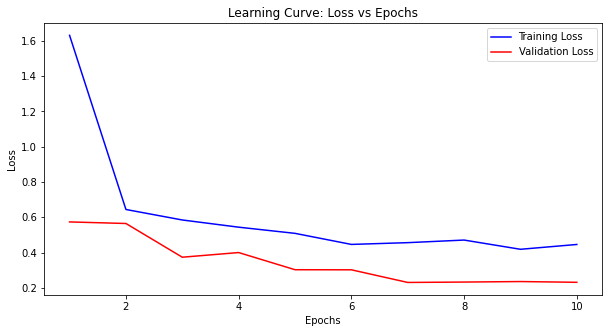

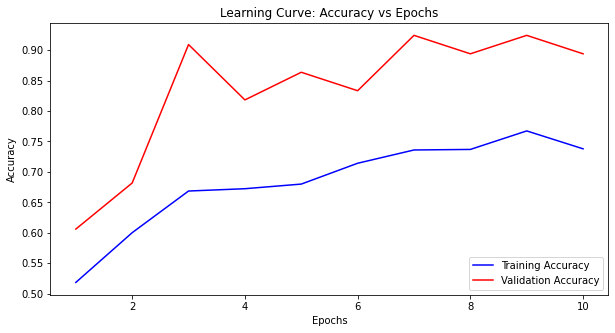

In [36]:
# training loss and accuracy
training_loss = [1.6306, 0.6438, 0.5843, 0.5435, 0.5085, 0.4458, 0.4558, 0.4705, 0.4182, 0.4455]
training_accuracy = [0.5185, 0.6002, 0.6686, 0.6724, 0.6800, 0.7142, 0.7360, 0.7369, 0.7673, 0.7379]
epochs = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
# validation loss and accuracy
validation_loss = [0.5733, 0.5644, 0.3733, 0.3997, 0.3024, 0.3019, 0.2303, 0.2325, 0.2354, 0.2311]
validation_accuracy = [0.6061, 0.6818, 0.9091, 0.8182, 0.8636, 0.8333, 0.9242, 0.8939, 0.9242, 0.8939]

# Plot the learning curve
plt.figure(figsize=(10,5))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Learning Curve: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Learning Curve: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [42]:

vgg16 = load_model('VGG16_v2.h5')
predict_prob = vgg16.predict(validation_set)

# Convert the predictions to class labels (e.g. 0 or 1)
y_pred = [np.argmax(i) for i in predict_prob]

# Get the actual labels from the test set
y_true = validation_set.classes



3/3 [==============================] - 44s 12s/step


In [ ]:
vgg16 = load_model('VGG16_v2.h5')
predict_prob = vgg16.predict(test_set)
predict_model = np.argmax(predict_prob,axis=1)
predict_model

submission = pd.DataFrame({"image_names":test_df['image_names'],
                           "mergency_or_not":predict_model})
submission.to_csv('submission_model_1.csv', index = False)